# Percolation Implementation and Experiments

## Percolation System

**Percolation theory** describes the behavior of a network when nodes or links are added. \
In this case, we wish to look into the behavior of a 2D square lattice. If liquid is poured from the top, what number of open sites is required to allow the liquid to flow to the bottom.

## Union Find

Union Find (disjoint set) is a well-known algorithm that is commonly used in this particular subject. \
It mainly supports:
- Adding new sets to the disjoint set.
- Merging disjoint sets to a single disjoint set using Union operation.
- Finding representative of a disjoint set using Find operation.
- Check if two sets are disjoint or not.

See a visual illustration of it at: https://yuminlee2.medium.com/union-find-algorithm-ffa9cd7d2dba

For this implementation, a virtual top and bottom site is added to connected to the top and bottom row at initialization to allow efficient computation.

## Loading packages

In [2]:
from percolation import *
from Exp import *
from scipy.stats import probplot

In the python script, two percolation classes are defined. \
`Percolation_single` allows user to create a system and open sites with specified percentage, then check whether it percolates.\
`Percolation_exp` allows sequential opening of sites, which would be used for experiments later on.

## Single percolation system

In [14]:
P=Percolation_single(100) # define a system of size 100 x 100
P.open(0.60) # open 60% of the sites
P.grid_union() # Perform union find for the system
P.percolates() # Check the system percolates or not


True

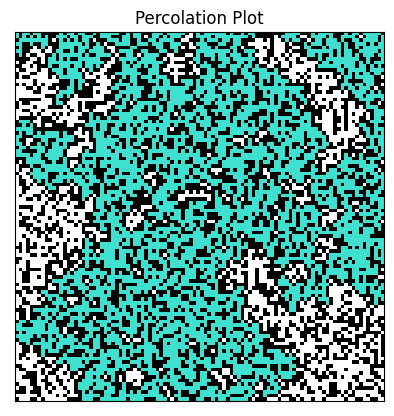

In [15]:
P.show()

The connected sites that allow flowing from top to bottom are shown in turqoise.

## Sequential opening

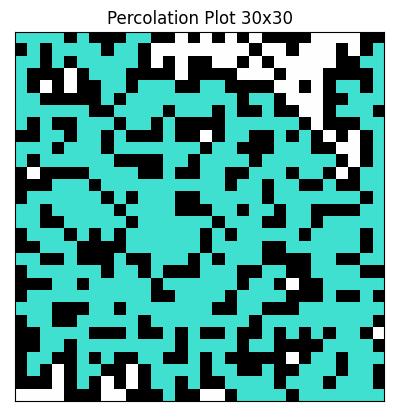

In [16]:
P=Percolation_exp(30) # define a system of size 30 x 30
P.show_animation() 

Feel free to test out different sizes. A save animation function is also provided (sample below).

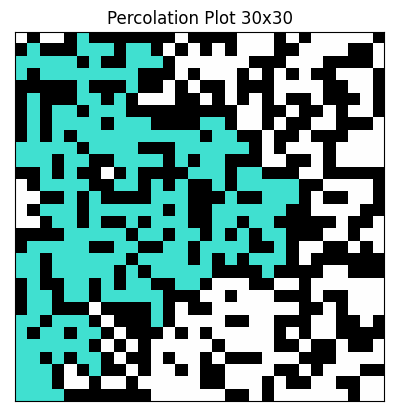

In [17]:
P=Percolation_exp(30)
P.save_animation()

The gif would be saved in the `animations` folder.

## Simulations with small grid sizes

An experiment class is defined for creating simulations. A simple experiment is shown below.

In [18]:
E=Exp(20,1000) # define a 20 x 20 percolation system, with 1000 trials
E.run() # open sites sequentially, and once the system percolates, record the number of opened sites in a list: E.res

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.22it/s]


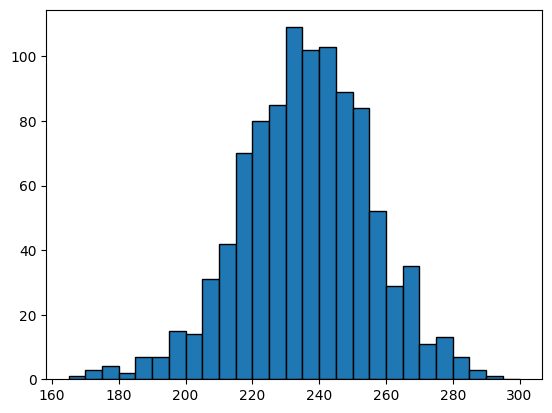

In [19]:
plt.hist(E.res, bins=np.arange(min(E.res), max(E.res) + 1, 5), edgecolor='black')
plt.show()

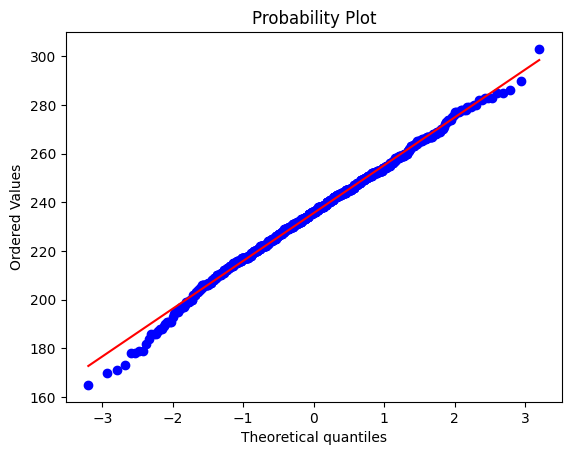

In [20]:
probplot(E.res, dist="norm", plot=plt)
plt.show()

We can see the distribution of the required sites seems to be normal.

In [25]:
#average percentage of opened sites
sum(E.res)/len(E.res)/(20*20)

0.5890375

Then, we can try to simulate with a larger system.

In [3]:
E=Exp(30,1000) # define a 30x30 percolation system, with 1000 trials
E.run()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.17it/s]


In [72]:
res=sorted(E.res)
percent=np.linspace(0,100,201)
counts = [0] * 201
j=0 # Pointer for 'res'
for i in range(201):
    threshold = percent[i]/100 * 30 * 30
    while j < len(res) and res[j] <= threshold:
        j += 1
    counts[i] = j/1000

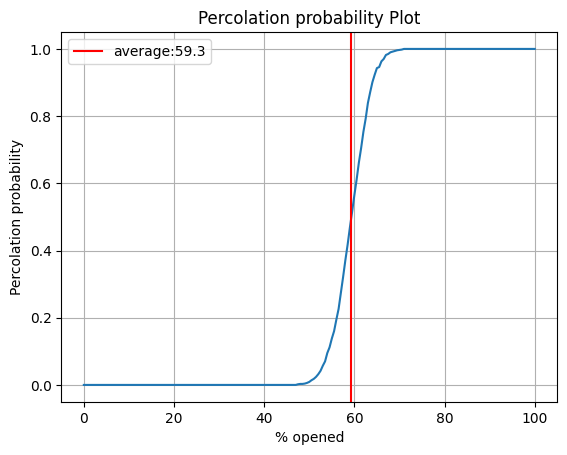

In [80]:
plt.plot(percent, counts)
plt.title('Percolation probability Plot')
plt.xlabel("% opened") 
plt.ylabel("Percolation probability") 
plt.axvline(x=sum(res)/len(res)/9, color='r', linestyle='-', label='average:'+str(round(sum(res)/len(res)/9,2)))
plt.grid()
plt.legend()
plt.show()

We see the average % of opened sites is similiar to the one of size 20 x 20.

## Simulations with various grid sizes

Here we define a helper function and simulate:

In [3]:
def sim(sizes, trials):
    percent=np.linspace(0,100,201)
    plt.figure()
    plt.title('Percolation probability Plot')
    plt.xlabel("% opened") 
    plt.ylabel("Percolation probability") 
    plt.grid()
    for size in sizes:
        E=Exp(size,trials) 
        E.run()
        res=sorted(E.res)
        counts = [0] * 201
        j=0
        for i in range(201):
            threshold = percent[i]/100 * size * size
            while j < len(res) and res[j] <= threshold:
                j += 1
            counts[i] = j/trials
        plt.plot(percent, counts, label='Size='+str(size))
    plt.legend()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:24<00:00,  4.89it/s]


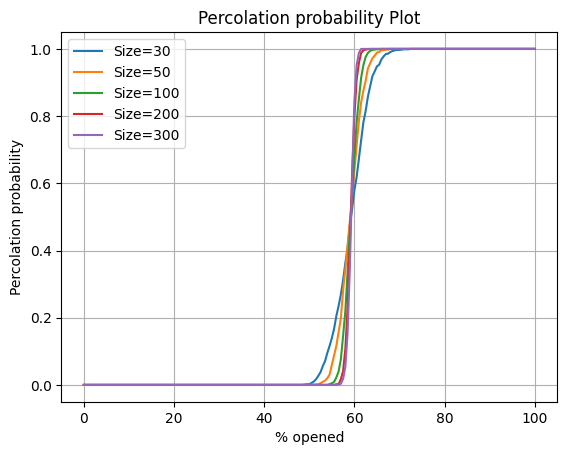

In [4]:
sizes=[30, 50, 100, 200, 300]
trials=1000

sim(sizes, trials)

We can observe the theoretical percolation threshold at approximately 59.3%.